In [1]:
import numpy as np
import scipy.io as sio

import matplotlib.pyplot as plt

In [72]:
indir = '/home/chen423/.tmp/AR-SST/HIST/moisture/intermediate_data/'

plotdir = '/raid1/chen423/serdp/data/paperX_analysis/AR-SST/plots/R1/'

In [73]:
indata = np.zeros((17532, 3))

sindex = 0
eindex = 0

year = 2003
print(year)
for month in np.arange(10,13):
    infile = indir + 'ETratio.HIST.ARabs.%d.%d.mat' % (year, month)
    tmpdata = sio.loadmat(infile)['array_grids'][0]
    eindex = eindex + tmpdata.shape[0]
    #print(year, month, sindex, eindex)
    indata[sindex:eindex, 0] = sio.loadmat(infile)['array_grids'][0]
    indata[sindex:eindex, 1] = sio.loadmat(infile)['array_ET'][0]
    indata[sindex:eindex, 2] = sio.loadmat(infile)['array_uIVT'][0]
    sindex = eindex
    
for year in np.arange(2004,2015):
    print(year)
    for month in np.arange(1,13):
        infile = indir + 'ETratio.HIST.ARabs.%d.%d.mat' % (year, month)
        tmpdata = sio.loadmat(infile)['array_grids'][0]
        eindex = eindex + tmpdata.shape[0]
        #print(year, month, sindex, eindex)
        indata[sindex:eindex, 0] = sio.loadmat(infile)['array_grids'][0]
        indata[sindex:eindex, 1] = sio.loadmat(infile)['array_ET'][0]
        indata[sindex:eindex, 2] = sio.loadmat(infile)['array_uIVT'][0]
        sindex = eindex
        
year = 2015
print(year)
for month in np.arange(1,10):
    infile = indir + 'ETratio.HIST.ARabs.%d.%d.mat' % (year, month)
    tmpdata = sio.loadmat(infile)['array_grids'][0]
    eindex = eindex + tmpdata.shape[0]
    #print(year, month, sindex, eindex)
    indata[sindex:eindex, 0] = sio.loadmat(infile)['array_grids'][0]
    indata[sindex:eindex, 1] = sio.loadmat(infile)['array_ET'][0]
    indata[sindex:eindex, 2] = sio.loadmat(infile)['array_uIVT'][0]
    sindex = eindex

2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015


In [17]:
valid_index =  (indata[:,0]>3000) & ((indata[:,1]+indata[:,2])>0) & (indata[:,1]>0)

valid_index.sum()

4509

In [80]:
ratios = (indata[valid_index,1]/(indata[valid_index,1]+indata[valid_index,2]))*100

print(ratios.mean())

mois_weighted_ratio = indata[valid_index,1].sum()/(indata[valid_index,1].sum() + indata[valid_index,2].sum())*100

5.141837992367177


In [53]:
ratio_hist, hist_bin_edge = np.histogram(ratios, bins=np.arange(0, 10.00001, 0.5))
nbins = hist_bin_edge.shape[0]-1

In [54]:
hist_bin_ct = (hist_bin_edge[0:nbins]+hist_bin_edge[1:(nbins+1)])/2

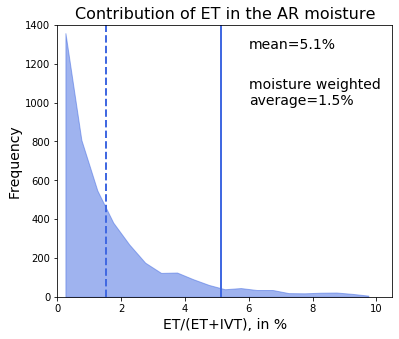

In [102]:
fig1 = plt.figure(figsize=(6,5))

ax1 = plt.subplot(1,1,1)

#ax1.plot(hist_bin_ct, ratio_hist, color='royalblue', linestyle='--', lw=2)
ax1.fill_between(hist_bin_ct, np.zeros(nbins), ratio_hist, color='royalblue', alpha=0.5)
ax1.plot(np.ones(10)*ratios.mean(), np.arange(0,1600,160), color='royalblue', lw=2)
ax1.plot(np.ones(10)*mois_weighted_ratio, np.arange(0,1600,160), color='royalblue', lw=2, linestyle='--')

ax1.set_xlim([0, 10.5])
ax1.set_ylim([0, 1400])

ax1.set_xlabel('ET/(ET+IVT), in %', fontsize=14)
ax1.set_ylabel('Frequency', fontsize=14)
ax1.set_title('Contribution of ET in the AR moisture', fontsize=16)

loc = ratios.mean()
ax1.text(6, 1300, 'mean=%.1f%%' % loc, ha='left', va='center', fontsize=14)
loc = mois_weighted_ratio
ax1.text(6, 1050, 'moisture weighted\naverage=%.1f%%' % loc, ha='left', va='center', fontsize=14)

#fig1.savefig(plotdir + 'fig_R3.ET_moistuer_contrib.png', dpi=600)

plt.show()
plt.close()
del(fig1)

In [99]:
plotdir

'/raid1/chen423/serdp/data/paperX_analysis/AR-SST/plots/R1/'